# 11. 머신러닝(군집문제)-2

## 군집 분석

### 비지도학습

## 계층 군집(Hierarchical clustering)

### 장점

- 덴드로그램(Dendrogram)을 그릴 수 있다.

    - 덴드로그램

        - 의미있는 분류 체계를 만들어 준다.

        - 군집 결과를 이해하는데 도움을 준다.

        - 누군가에게 군집 결과를 설명하는데 적합하다.

- 클러스터의 개수를 미리 지정하지 않아도 된다.


### 계층 군집을 형성하는 방법

- 병합 계층 군집(Agglomerative hierarchical clustering)

    - 클러스터당 하나의 데이터에서 시작하여, 모든 데이터가 하나의 클러스터에 속할 때까지 가장 가까운 클러스터를 병합해 나간다.

    - 병합 계층 군집을 이루는 2가지 기본 알고리즘

        - 단일 연결

            - 클러스터 쌍에서 가장 비슷한 즉, 가장 가까운 데이터 간의 거리를 계산

            -  그 다음, 거리의 값이 가장 작은 두 클러스터를 하나로 합치게 된다.

        - 완전 연결

            - 단일 연결과 비슷하지만 약간의 차이점이 있다.

            - 바로 클러스터 쌍에서 가장 비슷한 데이터를 찾는 것이 아니라

            - 가장 비슷하지 않은 데이터 즉, 가장 멀리 있는 데이터를 찾아 거리를 구한 후

            - 가장 가까운 두 클러스터를 합쳐준다.

- 분할 계층 군집(Divisive hierarchical clustering)

    - 전체 데이터를 포함하는 하나의 클러스터에서 시작해, 클러스터 속 데이터가 하나가 남을 때까지 반복적으로 클러스터를 나눈다.

#### 병합 계층 군집에서 사용하는 알고리즘

- 평균 연결

    - 두 클러스터에 있는 모든 샘플 사이의 평균 거리가 가장 작은 클러스터 쌍을 합치는 방식

- 와드 연결

    - 클러스터 내 SSE가 가장 작게 증가하는 두 클러스터를 합치는 방식

    - 두 군집이 합쳐졌을 때의 제곱 오차값(SSE)

### 완전 연결(Complete linkage)

동작 방식

1. 모든 데이터의 거리행렬을 계산한다.

2. 모든 데이터 포인트를 단일 클러스터로 표현한다.

3. 가장 비슷하지 않은 즉, 멀리 떨어진 데이터 간 거리에 기초하여 가장 가까운 두 클러스터를 하나로 합쳐준다.

4. 유사도 행렬 업데이트

5. 하나의 클러스터가 남을 때 까지 2 ~ 4 단계 반복

#### 1. 거리행렬 계산

In [1]:
import numpy as np

np.random.seed(123)
X = np.random.random_sample([5, 3])*10

In [2]:
X

array([[6.96469186, 2.86139335, 2.26851454],
       [5.51314769, 7.1946897 , 4.2310646 ],
       [9.80764198, 6.84829739, 4.80931901],
       [3.92117518, 3.43178016, 7.29049707],
       [4.38572245, 0.59677897, 3.98044255]])

In [3]:
import pandas as pd

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
df = pd.DataFrame(X, columns=variables, index=labels)

In [4]:
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [5]:
from scipy.spatial.distance import pdist, squareform

Y = pdist(df)

In [6]:
Y

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [7]:
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)

In [8]:
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


- pdist()

    - 축약된 거리 행렬값 반환

- squareform()

    - 거리행렬 벡터를 행렬형식으로 변환

In [9]:
from scipy.cluster.hierarchy import linkage

In [18]:
# 이렇게 하면 기대한 결과값과 다른 결과가 나옴

# row_clusters = linkage(row_dist, method='complete', metric='euclidean')


- help(linkage)

    - pdist 함수에서 축약된 거리 행렬을 입력 속성으로 사용

    - linkage 함수에서 초기 데이터 배열을 전달하고, 'euclidean' 지표를 매개변수로 사용

In [21]:
# 방법 1_축약된 거리 행렬 사용
# row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

# 방법 2_초기 데이터 배열 사용(원본 샘플)
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [22]:
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [23]:
pd.DataFrame(row_clusters,
            columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
            index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


#### 표 해석하기

- 무작위로 생성한 다섯 개의 데이터가 4개의 클러스터를 이뤘다.

- row label 1과 row label 2는 각 클러스터에서 완전 연결방식으로 병합된 클러스터를 나타낸다.

    - ex) 첫 번째 클러스터의 경우, 데이터의 라벨명인 ID_0와 ID_4가 병합되었다.

- distance는 클러스터 간의 거리

- no.of items in clust.는 이 군집에 속한 데이터의 수

    - ex) cluster 1은 데이터의 수가 2이다.

- cluster 3 의 row label 2에 나오는 ID_5는 ID_0와 ID_4가 병합한 클러스터의 명칭이다.

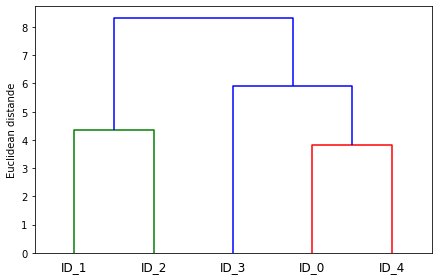

In [27]:
# 덴드로그램 그리기
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)

plt.tight_layout()
plt.ylabel('Euclidean distande')
plt.show()

- 계층 군집 덴드로그램은 주로 히트맵(heat map)과 함께 자주 사용되어 진다.

### 히트맵(Heat map)

- 열을 뜻하는 heat와 지도를 뜻하는 map을 합성한 용어

- 일정한 이미지 위 또는 측면에 열분포 형태로 데이터를 효과적으로 표현하는 시각화 기법

- 덴드로그램과 히트맵이 같이 사용되면 데이터 행렬의 개별 값을 색으로 표현할 수 있게 되고, 각 데이터셋을 조금더 효과적으로 요약할 수 있게 된다.

## 밀집도 기반 군집(DBSCAN)

- k-means 처럼 원형 클러스터를 가정하지 않는다.

- 데이터가 조밀하게 모인 지역에 클러스터 레이블을 할당한다.

- 밀집도

    - **특정 반경(ε, 엡실론)** 안에있는 **샘플의 개수(MinPts)**로 정의

1. 어떠한 데이터의 특정 반경 안에 있는 이웃점이 우리가 임의로 지정한 개수 이상이면 이 데이터는 **중심점**이 된다.

2. 다음으로 가장 가까운 점 기준, 특정 반경 이내에 지정된 개수보다 이웃은 적지만, 다른 중심점의 반경 안에 있으면, 이는 **경계점**이 된다.

3. 이러한 방식으로 점들을 할당하고 나서 그 어떠한 점에도 속하지 않는 모든 점들은 **이상치**가 된다.

- 반경(epsilon)

- 샘플의 개수(MinPts)

- 중심점(core point)

- 경계점(border point)

- 이상치(noise point)

#### 정리

- 임의의 점을 중심으로 엡실론(epsilon)) 반경 내의 최소 이웃수(MinPts) 이상의 점이 있다면 그 점을 중심으로 군집(cluster)이 되고, 그 점을 중심점(core point)라고 한다.

- 중심점(core point)가 서로 다른 core point의 군집의 일부가 되면 그 군집은 서로 연결되어 있다고 하고 하나의 군집으로 연결한다.

- 군집에는 속하지만 스스로 core point가 되지 못하는 점을 경계점(border point)라고 한다.

- border point는 주로 군집(cluster)의 외각을 이루는 점들이다.

- 그 어떠한 클러스터에도 속하지 못한 점들은 이상치(noise point)가 된다.

#### 장점

- 클러스터 모양을 원형으로 가정하지 않는다는 것

- 모든 데이터들을 클러스터에 할당하지 않아도 되기에, 자연스럽게 이상치 데이터들을 구분할 수 있게 된다.



In [28]:
# 반달 모양 형태의 데이터 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

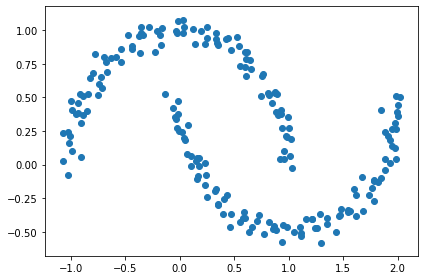

In [29]:
# 산점도 그리기
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

In [31]:
# 밀집도 기반 군집 분석
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

- DBSCAN()

    - eps: 엡실론

    - min_samples: 최소 이웃수

    - metric: 거리 측정 기법

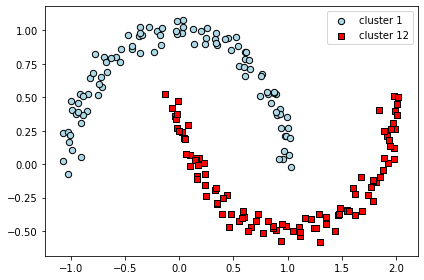

In [34]:
# 산점도 시각화
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='lightblue', marker='o', s=40, edgecolor='black', label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='red', marker='s', s=40, edgecolor='black', label='cluster 12')
plt.legend()
plt.tight_layout()
plt.show()

- 복잡한 구조를 가진 데이터 셋을 구분하는데 있어 성능이 좋다.

### 단점

- 데이터의 특성이 늘어남에 따라 차원의 저주로 인한 역효과가 증가하게 된다.

차원의 저주

- 유클리디안 거리 측정 방식을 사용하는 다른 군집 알고리즘에도 영향이 미친다.

- 해결방법: 차원 축소, 표준화

밀집도 기반 군집의 하이퍼파라미터 최적화

- 엡실론, 최소 이웃수

성공적인 군집을 위한 조건

- 하나의 알고리즘과 일정한 하이퍼파라미터에 의존하지 말라.

- 적절한 거리지표를 선택

- 실험 환경을 구성하는데 있어 도움을 줄 수 있는 도메인 지식을 갖추는 것

<br/>

--------------

### 퀴즈

1. 계층 군집을 형성하는 방법에는 병합 계층 군집과 _ _ 계층 군집으로 나누어 진다.
    
    답: 분할

2. 병합 계층 군집을 이루는 알고리즘 중 클러스터 쌍에서 가장 가까운 데이터 간의 거리를 계산하여 거리의 값이 가장 작은 두 클러스터를 하나로 합치는 연결 방식(알고리즘)은 무엇인가요?

    답: 단일 연결

3. 밀집도 기반 군집은 원형 클러스터를 가정하지 않는다.

    답: O